1. Elección de datos y breve descripción de su naturaleza.

Nuestro dataset fifa_players.csv obtenido en Kaggle, recoge ~
17,000 entradas de futbolistas (hombres), con 51 características, como nombre, edad, peso, habilidades, puntuación global o posición en el campo, por ejemplo.

Sobre esta muestra de ~17,000 entradas vamos a realizar una caracterización de la distribución de las variables y un análisis de variación (ANOVA) a partir del cual trataremos de inferir conclusiones sobre la población (total de futbolistas hombres en el mundo).

Para ello, necesitamos las siguientes librerías:

In [ ]:
!pip install distfit
!pip install pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 23.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
import math
from distfit import distfit
from itertools import combinations
import pycountry_convert as pc
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols

ModuleNotFoundError: No module named 'distfit'

2. Realizamos un analisis preliminar .head() y .describe() y visualizamos la distribución de cada variable con histogramas:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fifa_all = pd.read_csv('/content/drive/MyDrive/fifa_players.csv')
fifa_all.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [ ]:
fifa_all.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


3. Comprobación de la normalidad de alguna/s variable/s del conjunto de datos.


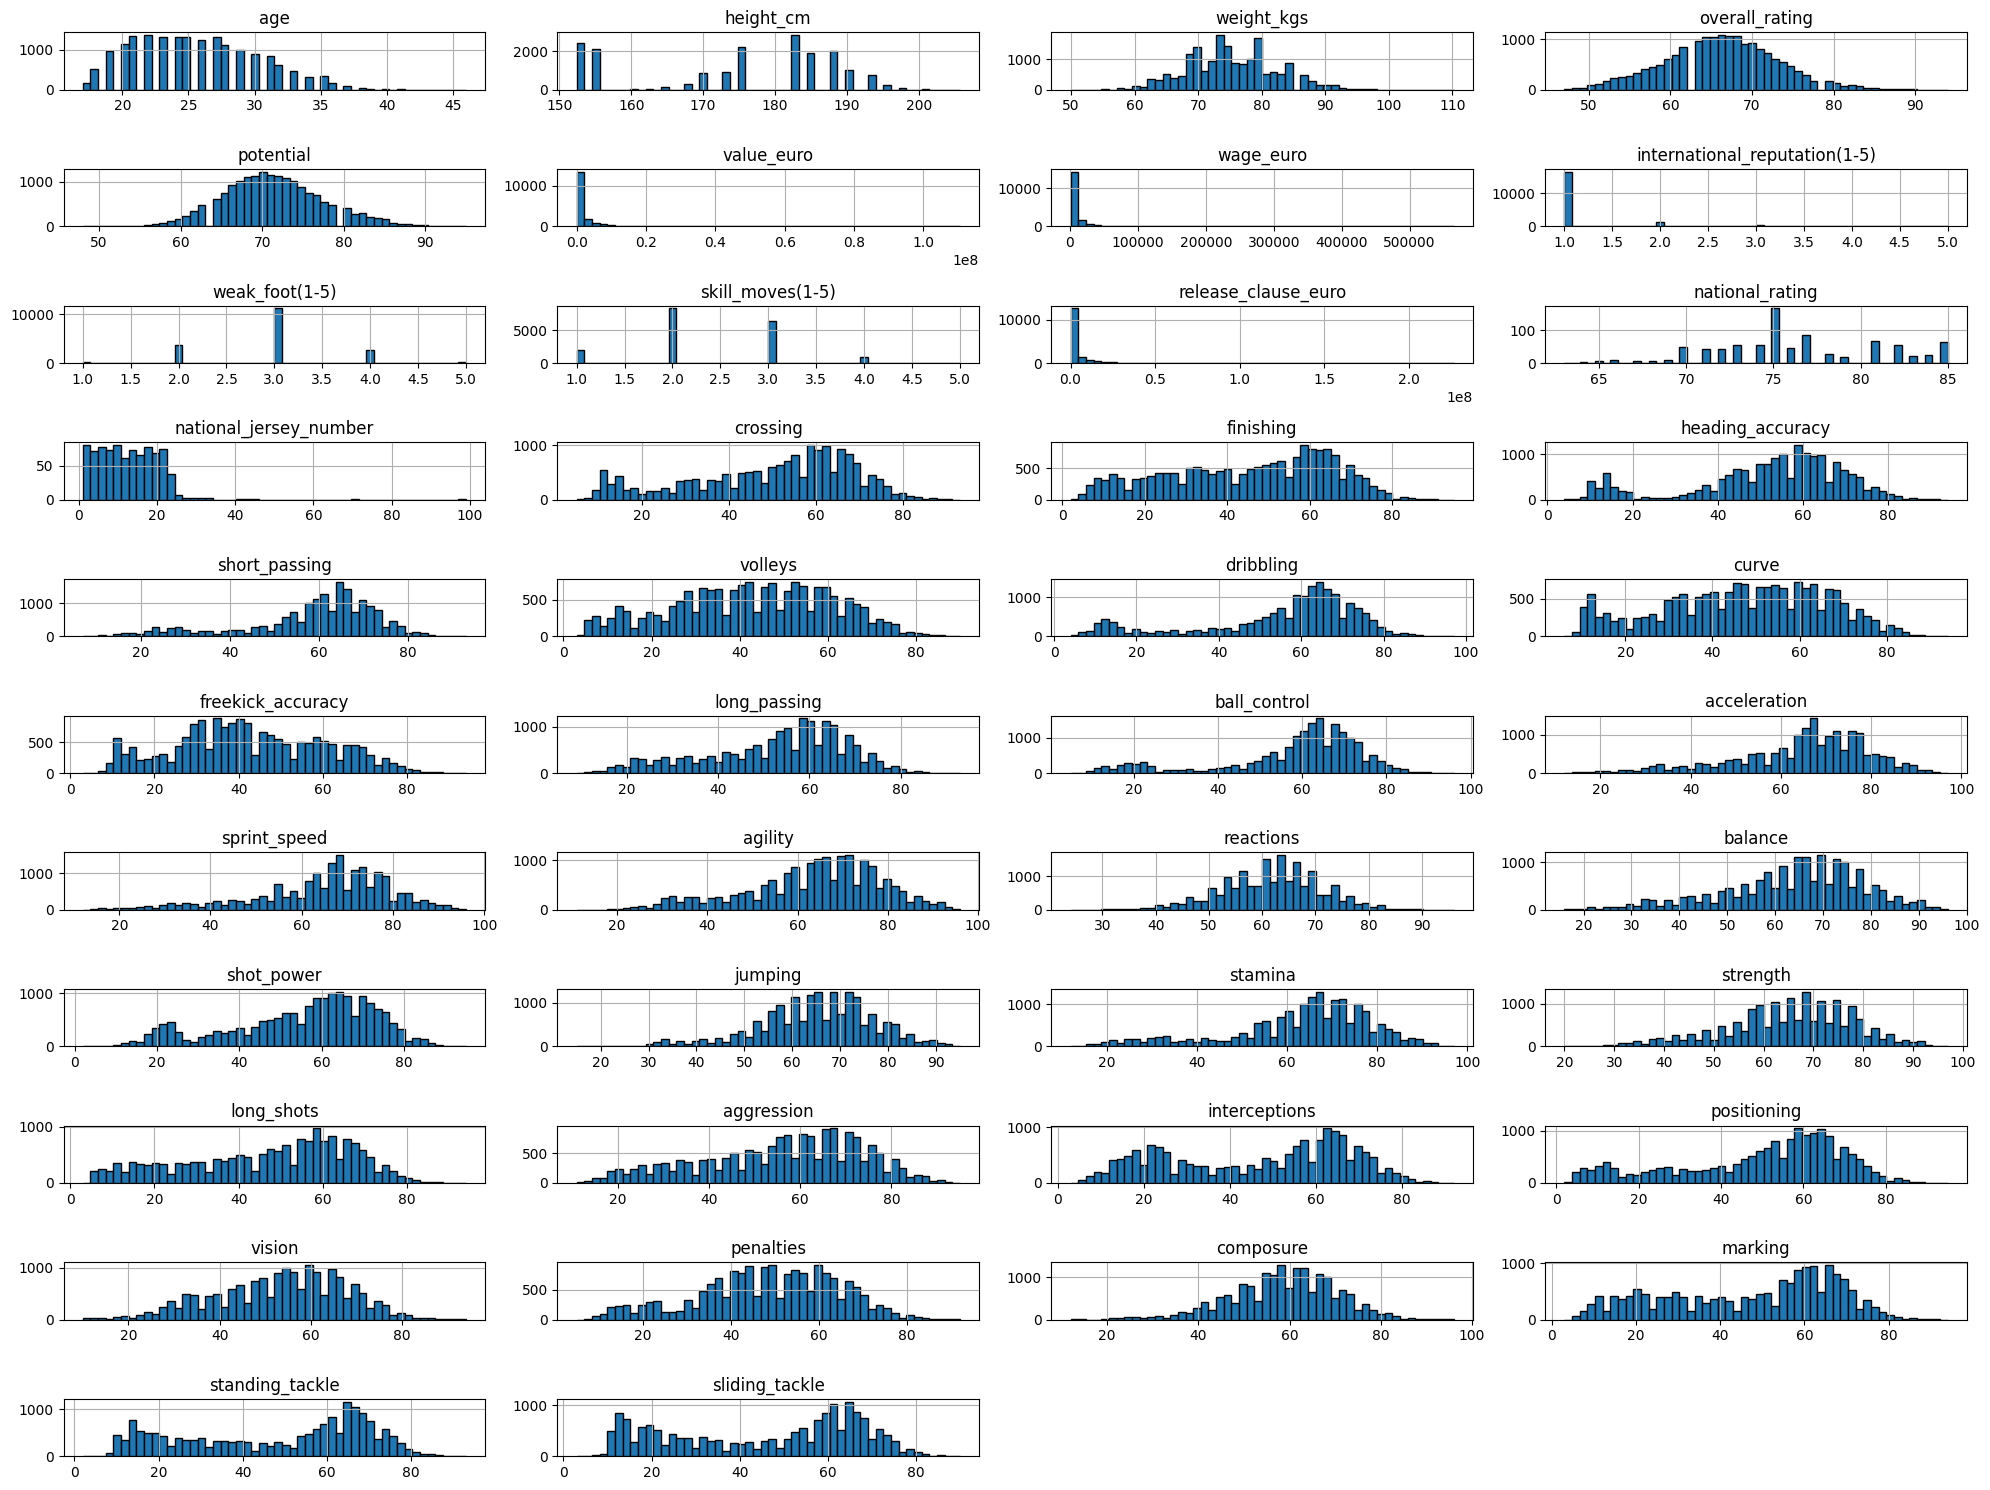

In [ ]:
columns = fifa_all.columns

fifa_all.hist(figsize=(20, 15), bins=50, layout=(-1, 4), edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:


plt.show()

A partir del analisis de las distribuciones de las variables anteriores parece que overal_rating y potential puedan seguir una distribución normal. Por otro lado, del describe() y del head(), decidimos tomar nacionalidad y posición como variables categóricas, ya parecen dos variables interesantes sobre las que poder inferir luego en la población:

- Debido a la cantidad de países, decidimos agrupar por continentes mediante la librería 'pycountry_convert'. Aquí perdemos resolución, pero nos permite seguir realizando un análisis interesante y, en un futuro, se podría analizar cada país continente a continente.

- Para evitar inconsistencias vamos a limpiar los N/A.

- Seleccionaremos una posición primaria en el campo para cada jugador, ya que algunos pueden desenvolverse en varias posiciones.


In [ ]:
# Group by positions
# Note: Since players can have multiple positions, here we consider just their primary position.
fifa_all['primary_position'] = fifa_all['positions'].apply(lambda x: x.split(',')[0])

# Renaming entries in column 'primary_position'
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'GK': 'PORTERO'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'CAM': 'MEDIO OF'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'CM': 'CENTROCAM.'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'LW': 'EXT IZQ'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'RW': 'EXT DER'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'CB': 'DEF CENT'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'ST': 'ATAC'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'CF': 'DEL CENT'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'CDM': 'CENT DEF'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'LB': 'LAT IZQ'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'RB': 'LAT DER'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'LM': 'CENT IZQ'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'RM': 'CENT DER'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'LWB': 'INT IZQ'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'RWB': 'INT DER'})

# Definir una función para obtener el continente de un país
def get_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None

# Aplicar la función a la columna 'nationality' para obtener el continente correspondiente
fifa_all['continent'] = fifa_all['nationality'].apply(get_continent)

# Ahora, fifa_all contiene una nueva columna 'continent' que indica el continente al que pertenece cada país

fifa_all = fifa_all.dropna(subset=['continent'])

A conticuación pasamos a corroborar con el density,

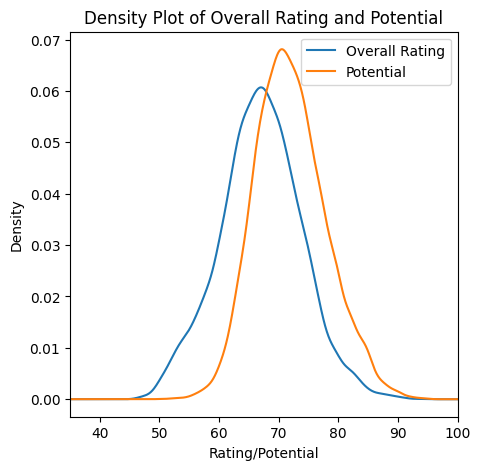

In [ ]:
fifa_all["overall_rating"].plot(kind="density",
                                figsize=(5,5),
                                xlim=(35, 100),
                                label='Overall Rating')

# Plot the density for potential on the same figure
fifa_all['potential'].plot(kind="density",
                           figsize=(5,5),
                           xlim=(35, 100),
                           label='Potential')

plt.title('Density Plot of Overall Rating and Potential')
plt.xlabel('Rating/Potential')
plt.ylabel('Density')
plt.legend()

plt.show()


Ahora, mediante la librería distfit analizamos qué distribucuón se ajustaría mejor a 'overall_rating' y 'potential':

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.034634] [loc=66.955 scale=6.850]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0767882] [loc=47.000 scale=19.955]
[distfit] >INFO> [pareto    ] [0.08 sec] [RSS: 0.0767882] [loc=-4294967249.000 scale=4294967296.000]
[distfit] >INFO> [dweibull  ] [0.33 sec] [RSS: 0.0365272] [loc=66.558 scale=5.831]
[distfit] >INFO> [t         ] [3.01 sec] [RSS: 0.0345666] [loc=66.952 scale=6.700]
[distfit] >INFO> [genextreme] [2.04 sec] [RSS: 0.0353982] [loc=64.332 scale=6.780]
[distfit] >INFO> [gamma     ] [0.53 sec] [RSS: 0.0346768] [loc=-321.561 scale=0.121]
[distfit] >INFO> [lognorm   ] [0.04 sec] [RSS: 0.034675] [loc=-532.976 scale=599.892]
[distfit] >INFO> [beta      ] [0.53 sec] [RSS: 0.0347023] [loc=-191.723 scale=857851.599]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0660605] [loc=47.000 scale=47.000]
[distfit] >INFO> [loggamma  ] [0.50 sec] [RSS: 0.0346148] [loc=-1340.990 scale=206.809]
[di

          name     score           loc          scale  \
0            t  0.034567     66.951764       6.700384   
1     loggamma  0.034615  -1340.989679     206.808831   
2         norm  0.034634      66.95516       6.849508   
3      lognorm  0.034675   -532.976173     599.892236   
4        gamma  0.034677   -321.560616       0.120763   
5         beta  0.034702   -191.722822  857851.598606   
6   genextreme  0.035398     64.331863       6.779752   
7     dweibull  0.036527     66.558092       5.831256   
8      uniform  0.066061          47.0           47.0   
9       pareto  0.076788 -4294967249.0   4294967296.0   
10       expon  0.076788          47.0       19.95516   

                                       arg  \
0                      (46.2785791710783,)   
1                      (905.486319525809,)   
2                                       ()   
3                  (0.011416715338438504,)   
4                    (3217.1606013316523,)   
5   (1424.8942962675383, 4723942.152702

[distfit] >INFO> Estimated distribution: T(loc:66.951764, scale:6.700384)


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nt(df=46.2786, loc=66.9518, scale=6.70038)'}, xlabel='Values', ylabel='Frequency'>)

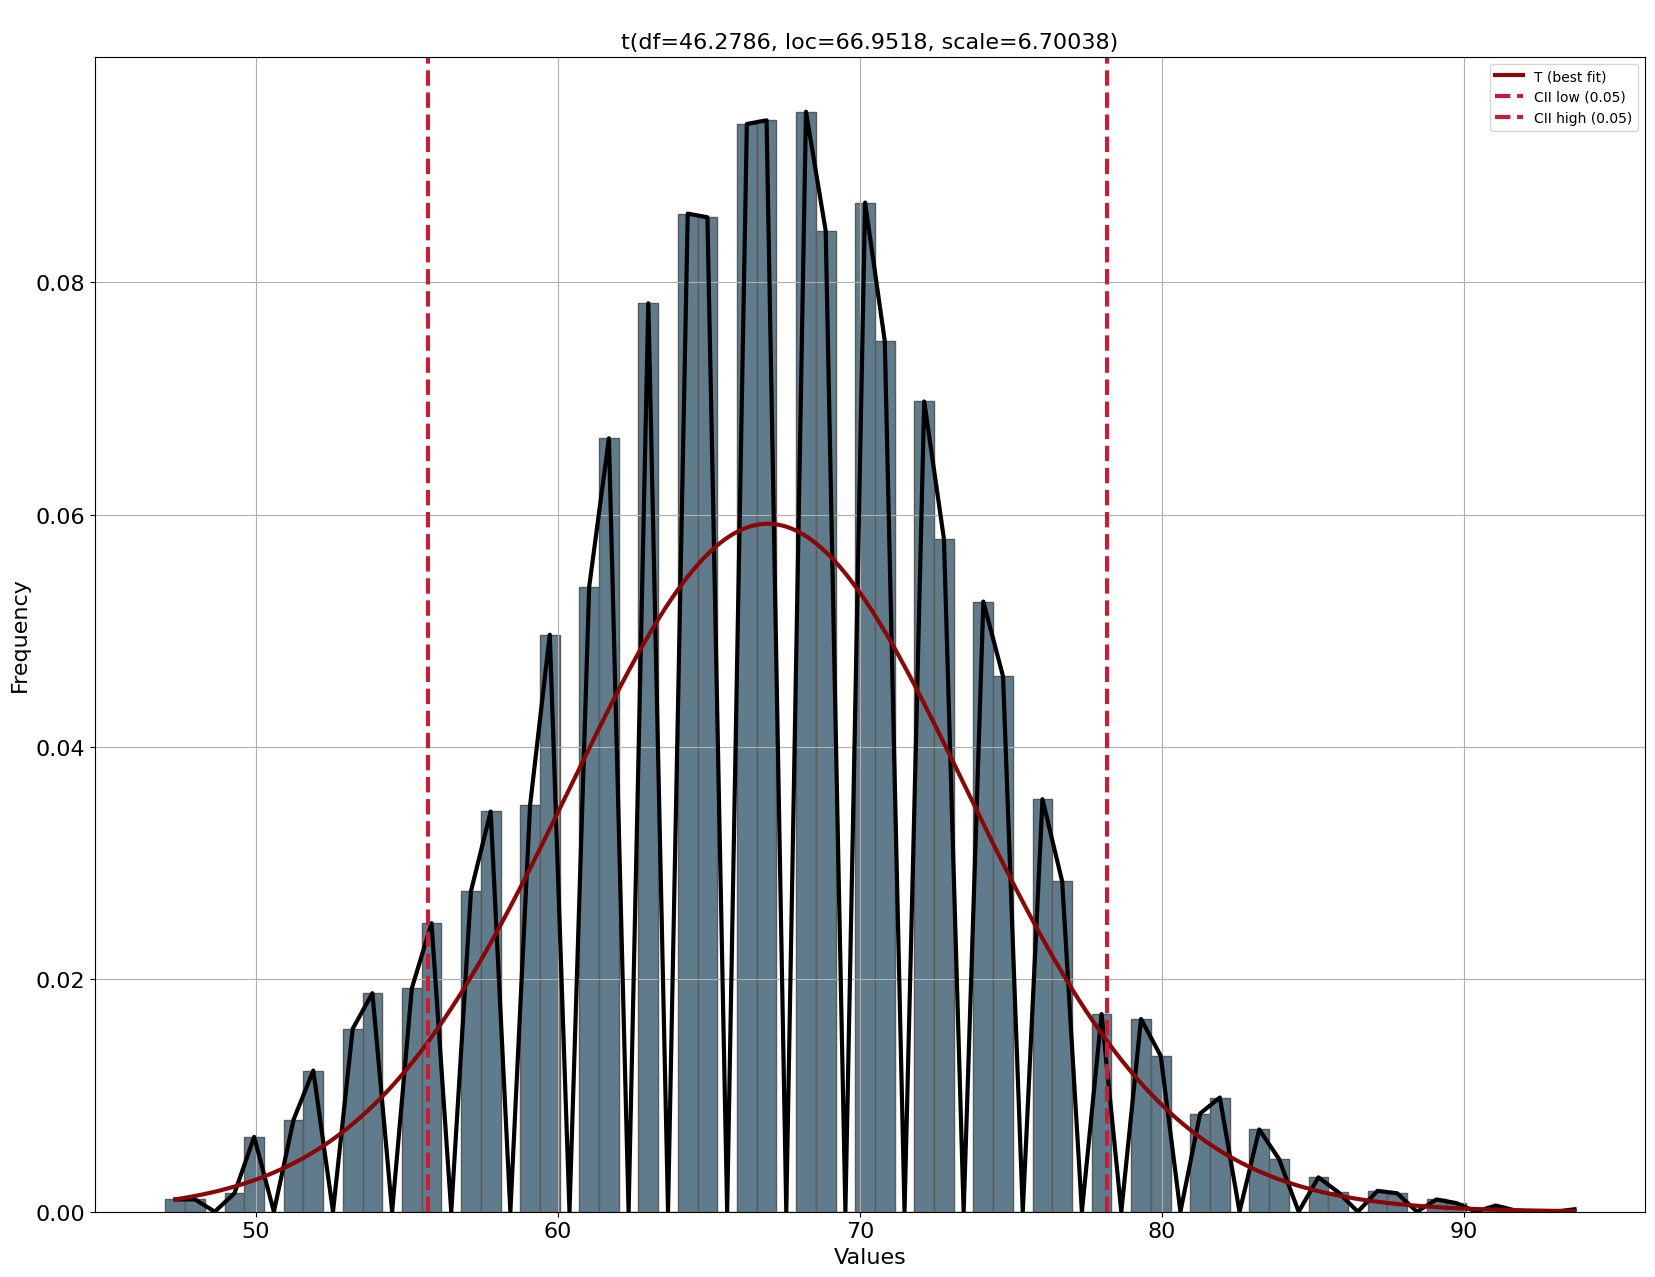

In [ ]:
# Initialize distfit
dist = distfit()

# Fit the distribution to your data
dist.fit_transform(fifa_all["overall_rating"])

# Print the summary of the best fit distribution
print(dist.summary)

# Optionally, you can also plot the best fit distribution against your data
dist.plot()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0396767] [loc=72.011 scale=5.949]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.094536] [loc=50.000 scale=22.011]
[distfit] >INFO> [pareto    ] [0.03 sec] [RSS: 0.094536] [loc=-4294967246.000 scale=4294967296.000]
[distfit] >INFO> [dweibull  ] [0.16 sec] [RSS: 0.0412437] [loc=71.556 scale=5.122]
[distfit] >INFO> [t         ] [1.38 sec] [RSS: 0.0396212] [loc=71.989 scale=5.876]
[distfit] >INFO> [genextreme] [1.27 sec] [RSS: 0.038989] [loc=69.673 scale=5.622]
[distfit] >INFO> [gamma     ] [0.09 sec] [RSS: 0.0389687] [loc=32.645 scale=0.898]
[distfit] >INFO> [lognorm   ] [0.02 sec] [RSS: 0.0389467] [loc=15.163 scale=56.540]
[distfit] >INFO> [beta      ] [0.46 sec] [RSS: 0.0389795] [loc=34.839 scale=533.514]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0792524] [loc=50.000 scale=45.000]
[distfit] >INFO> [loggamma  ] [0.20 sec] [RSS: 0.0398063] [loc=-1688.489 scale=238.960]
[distfit] >INF

          name     score           loc         scale  \
0      lognorm  0.038947     15.162712     56.539606   
1        gamma  0.038969     32.645281      0.898122   
2         beta   0.03898     34.839015    533.513505   
3   genextreme  0.038989     69.673379       5.62243   
4            t  0.039621     71.988983      5.876116   
5         norm  0.039677     72.011038      5.949244   
6     loggamma  0.039806  -1688.489182    238.959605   
7     dweibull  0.041244     71.555988       5.12178   
8      uniform  0.079252          50.0          45.0   
9       pareto  0.094536 -4294967246.0  4294967296.0   
10       expon  0.094536          50.0     22.011038   

                                      arg  \
0                  (0.10435444637462324,)   
1                    (43.83118967823402,)   
2   (36.325054347986566, 485.01545870984)   
3                  (0.18823730277704265,)   
4                    (81.78550501050199,)   
5                                      ()   
6           

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nlognorm(s=0.104354, loc=15.1627, scale=56.5396)'}, xlabel='Values', ylabel='Frequency'>)

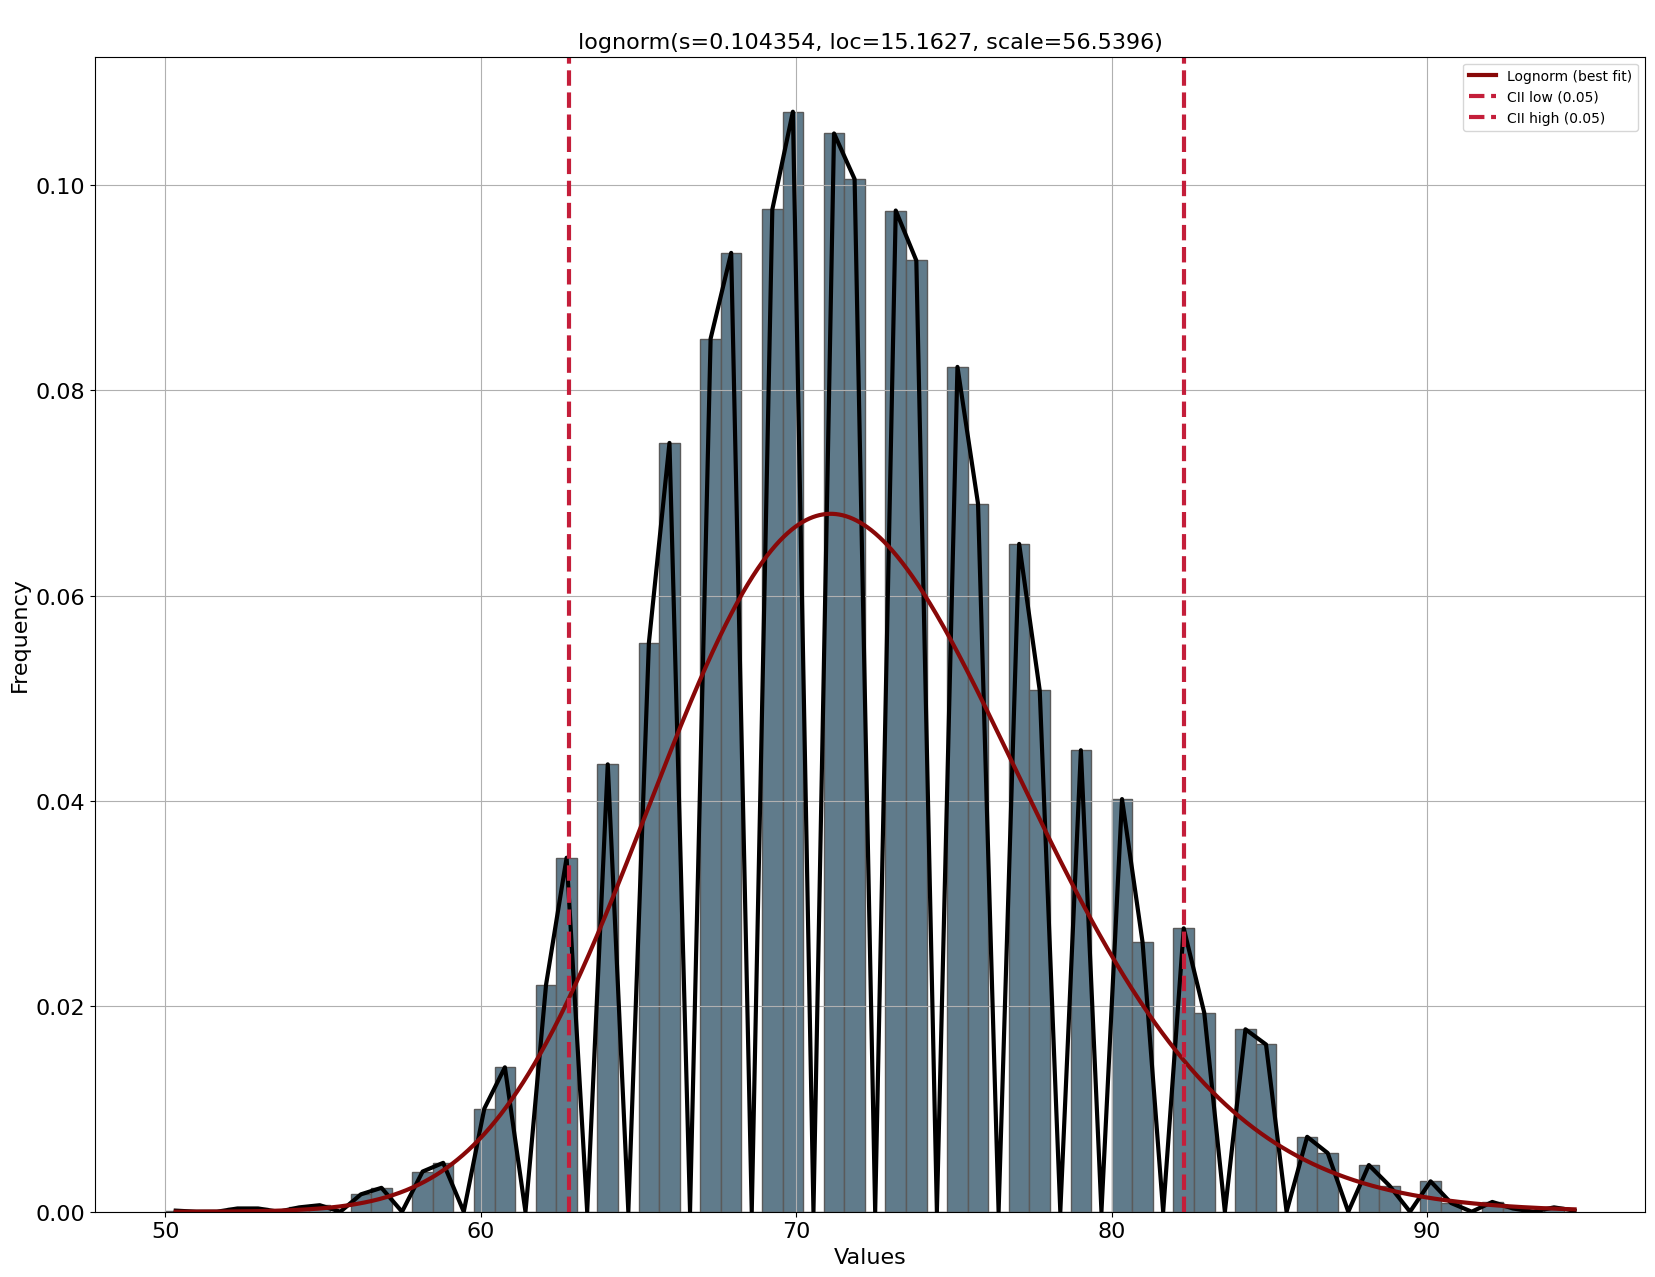

In [ ]:
# Initialize distfit
dist = distfit()

# Fit the distribution to your data
dist.fit_transform(fifa_all["potential"])

# Print the summary of the best fit distribution
print(dist.summary)

# Optionally, you can also plot the best fit distribution against your data
dist.plot()

Pese a que ni 'overall_rating' ni 'potential' se ajustan a una distribución normal, 'overall_rating' se ajusta a una distribución t. Por similaridad con una normal, proseguimos con el análisis con esta variable.

Analizamos mediante whisker plots las variables categóricas 'continent' y 'position' sobre 'overall_rating'

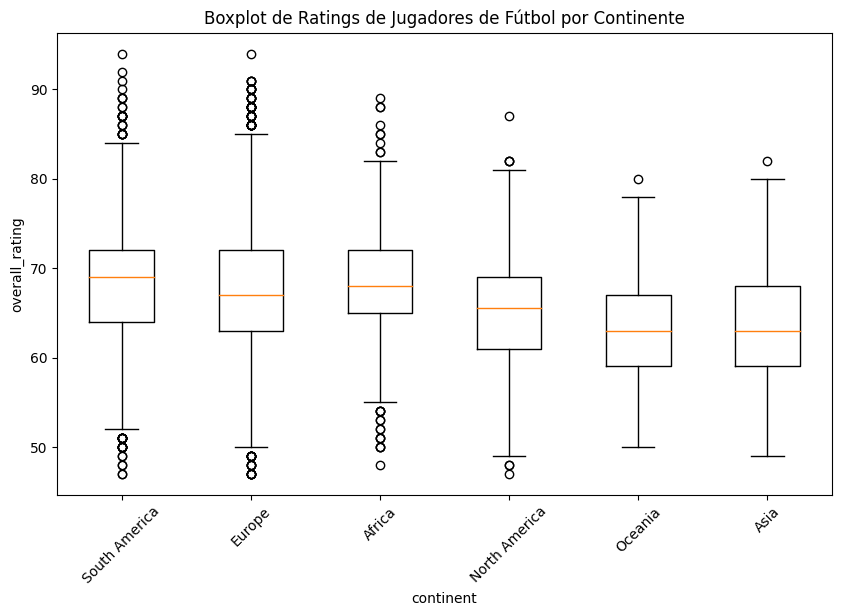

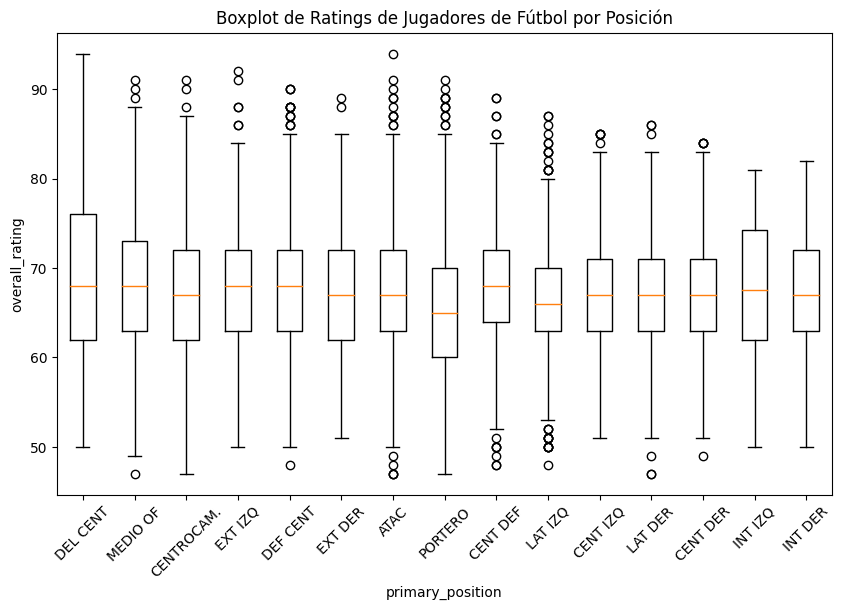

In [ ]:
# Boxplot by continent over overall_rating
fifa_all = fifa_all.dropna(subset=['continent'])
plt.figure(figsize=(10, 6))
plt.boxplot([fifa_all[fifa_all['continent'] == nationality]['overall_rating'] for nationality in fifa_all['continent'].unique()],
            labels=fifa_all['continent'].unique())
plt.xlabel('continent')
plt.ylabel('overall_rating')
plt.title('Boxplot de Ratings de Jugadores de Fútbol por Continente')
plt.xticks(rotation=45)
plt.show()

# Boxplot by position over overall_rating
fifa_all = fifa_all.dropna(subset=['primary_position'])
plt.figure(figsize=(10, 6))
plt.boxplot([fifa_all[fifa_all['primary_position'] == nationality]['overall_rating'] for nationality in fifa_all['primary_position'].unique()],
            labels=fifa_all['primary_position'].unique())
plt.xlabel('primary_position')
plt.ylabel('overall_rating')
plt.title('Boxplot de Ratings de Jugadores de Fútbol por Posición')
plt.xticks(rotation=45)
plt.show()

Aquí podemos observar algunos datos interesantes:

- Sudamérica, Europa y África tienen muchos mas outliers que el resto de continentes.
- Análogamente, tienen unos q1, mediana y q3 también mayores. Esto cuadra con la percepción de que son continentes con jugadores más conocidos.
- La posición de delantero centro (CF) tiene el valor de puntuación más alto, seguido por centrocampista atacante (CAM) y el de portero (GK), el más bajo. Llama la atención que la posición de mediocentro (CM) también posee uno de las puntuaciones más bajas. ¿Quizá porque engloba a los centrocampistas defensivos/stoppers?.

Previo a realizar nos análisis de variación, calculamos el valor crítico Z con un parámetro q = 0.975 en lugar de 0.95, ya que la distribución tiene dos colas:

In [ ]:


overall_rating = fifa_all['overall_rating']
overall_rating_size=fifa_all['overall_rating'].count()

overall_rating_mean = overall_rating.mean()


z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)

pop_stdev = overall_rating.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(overall_rating_size))


confidence_interval = (overall_rating_mean - margin_of_error,
                       overall_rating_mean + margin_of_error)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(66.84365401299122, 67.06666607530899)


A continuación, pasamos a los análisis de variación (ANOVA) de ambos factores, 'continent' y 'primary_position', en 'overall_rating'. Nuestra hipótesis nula, H0, es que estos factores no tienen impacto estadístico en 'overall_rating':

In [ ]:
# ANOVA continent vs overall_rating
model = ols('overall_rating ~ continent',                 # Model formula
            data = fifa_all).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

# ANOVA continent vs overall_rating
model = ols('overall_rating ~ primary_position',                 # Model formula
            data = fifa_all).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                  sum_sq       df           F         PR(>F)
continent   30811.257123      5.0  137.523224  5.932954e-143
Residual   649279.596906  14490.0         NaN            NaN
                         sum_sq       df          F        PR(>F)
primary_position    9289.880526     14.0  14.324747  7.805218e-35
Residual          670800.973502  14481.0        NaN           NaN


In [ ]:
# Agrupar los datos por continente y calcular la varianza de 'overall_rating' para cada grupo
grouped = fifa_all.groupby('continent')['overall_rating'].apply(list)

# Convertir los datos en una lista de listas
data = [group for group in grouped]

# Aplicar la prueba de Levene desempaquetando los datos
statistic, p_value = levene(*data)

# Imprimir los resultados
print("Estadístico de Levene:", statistic)
print("Valor p:", p_value)

# Agrupar los datos por posición y calcular la varianza de 'overall_rating' para cada grupo
grouped = fifa_all.groupby('primary_position')['overall_rating'].apply(list)

# Convertir los datos en una lista de listas
data = [group for group in grouped]

# Aplicar la prueba de Levene desempaquetando los datos
statistic, p_value = levene(*data)

# Imprimir los resultados
print("Estadístico de Levene:", statistic)
print("Valor p:", p_value)

Estadístico de Levene: 11.620993408965496
Valor p: 3.153276520085977e-11
Estadístico de Levene: 15.89916153852557
Valor p: 2.755061272674813e-39


- Como podemos observar, ambos factores poseen un F-stat elevado, especialmente 'continent', así como unos p-valores cercanos a cero (10^-143 y 10^-35), por lo que podemos considerar ambos factores como significativos y descartar las hipótesis nulas: los factores no tienen influencia estadística en 'overall_rating'.

4. Estimación puntual y por intervalos de los parámetros poblacionales de
algunas variables.

- En este punto necesitaremos decidir si nuestros datos son una muestra para hacer inferencia sobre la población o la población.

- Intervalos de confianza en la estimación de parametros. Z=sigma/raiz2n

- Creacion de intervalos de confianza tanto con la normal como con la t


5. Realización de contrastes de hipótesis oportunos para realizar inferencia con
los datos
- Normalidad de las muestras o población

- Media

- Varianza


6. Realización de ANOVA (cond. de aplicabilidad, ANOVA, post-hoc) para
obtener conclusiones de los datos

- Ya tenemos la anova de ayer y esta genial, ver otras posibilidades.

- Analisis de homocedasticidad y justificación.

- Justificación del uso de la ANOVA

7. Cosas que podríamos añadir y que he visto en los apuntes:

- Potencia de lo test utilizados

- Representación de los errores tipo I y II

- Muestras pareadas.

- Plot de las diferentes muestras y sus intérvalos de confianza.

- Revisar exponencial

- Pensar en si podemos convertir alguna variable en una binomial.

- Investigar cualquier otra via, posibilidad de extrapolar a una posible población más grande los resultados de nuestra población.



tips:
Sumario a la izquierda
Objetivos: generales y especificos
Materiales dataset, metodología, todos las pruebas que se van a realizar y el objetivo de ellas
Resultados, analisis y librerias
Definición de variables: clining del dataset
descriptiva variante y bivariante una de cada tipo de variable
Comentar relaciones causa efecto pero no categorizando los datos
Explicar los gráficos
Diferentes tipos de gráficos
Comentar los resultados de cada ejecución
Estudio de normalidad: hombres, mujeres y todos
Contrastes de hipotesis
Inferencia estadistica, puntual y por intervalos
Contrastes de hipotesis
Anova, condiciones de aplicabilidad, etc..
Conclusiones, lo más importante